In [1]:
using Pkg
Pkg.activate("C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\env\\integrate\\")

#using StaticArrays, DifferentialEquations, DynamicalSystems
using CairoMakie, JLD, Polynomials

  Activating project at `C:\Users\Alex\Desktop\repo\2612\0903\dynamical-systems\env\integrate`


In [56]:
function equat(x, c)
    a = c[1] .+ c[2]*x .+ c[3]*x.^2 .+ c[4]*x.^3 .+ c[5]*x.^4 + c[6]*x.^5
    b = c[7]*x.^6 + c[8]*x.^7 + c[9]*x.^8  + c[10]*x.^9 + c[11]*x.^10 
    c = c[12]*x.^11 + c[13]*x.^12 + c[14]*x.^13 + c[15]*x.^14
    return a + b + c
end

function equat_(x, c)
    c[1] .+ c[2]*x .+ c[3]*x.^2 .+ c[4]*x.^3 .+ c[5]*x.^4
end

equat_ (generic function with 1 method)

In [46]:
"""I0double = load("I0.jld")["data"]
U0double = load("U0.jld")["data"]
I0double = I0double[:]
U0double = U0double[:]

I0Hopf = load("I0Hopf.jld")["data"]
U0Hopf = load("U0Hopf.jld")["data"]
I0Hopf = I0Hopf[:]
U0Hopf = U0Hopf[:];"""

In [3]:
I0double = load("I0doubleext.jld")["data"]
U0double = load("U0doubleext.jld")["data"]
I0double = I0double[:]
U0double = U0double[:];

I0hopf = load("I0_Hopf_detailed.jld")["data"]
U0hopf = load("U0_Hopf_detailed.jld")["data"]
I0hopf = I0hopf[:]
U0hopf = U0hopf[:];

In [57]:
f_ = fit(U0double, I0double, 14);
test = equat(U0double, f_.coeffs);

In [58]:
U0range = range( 0.25648241206030153,  0.5457310073554611, length = 4000 )
test1 = equat(U0range, f_.coeffs);

In [60]:
save("I0doubleext_approx.jld", "data", test1)
save("U0doubleext_approx.jld", "data", U0range)

In [61]:
I0double[1], U0double[1]

(-1.7316926832305901, 0.2581407087493362)

In [62]:
test1[1], U0range[1]

(-1.7584921450961701, 0.25648241206030153)

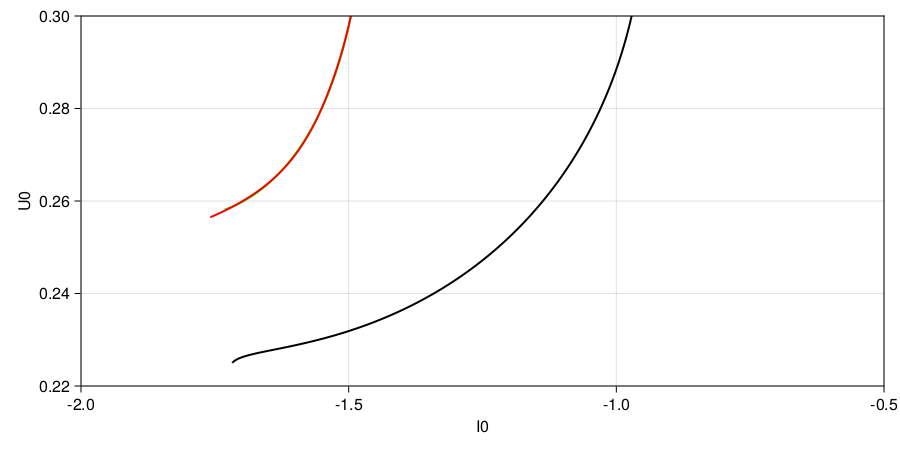

In [59]:
f = Figure(resolution = (900, 450))
axis = Axis(f[1, 1], xlabel = "I0", ylabel = "U0")


lines!(axis, I0double, U0double, linewidth = 2.0, color = :lime)
lines!(axis, test1, U0range, linewidth = 2.0, color = :red)

lines!(axis, I0hopf, U0hopf, linewidth = 2.0, color = :black)
xlims!(-2.0, -0.5)
ylims!(0.22,  0.3)
f

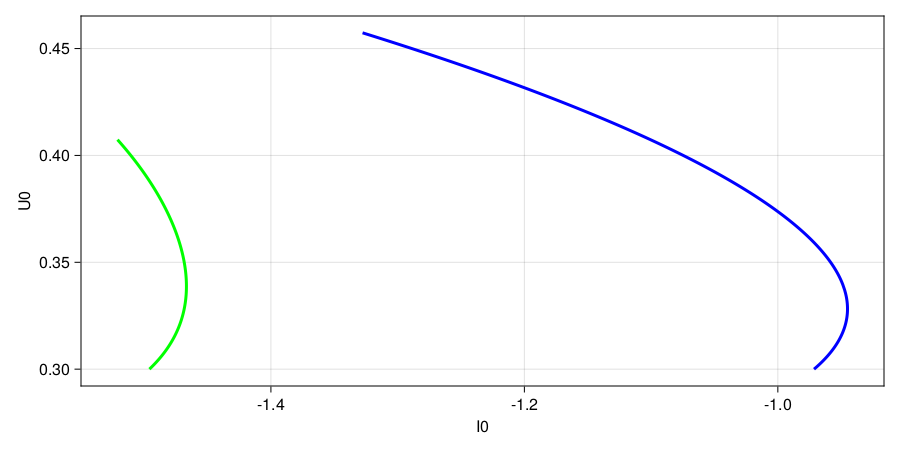

In [47]:
f = Figure(resolution = (900, 450))
axis = Axis(f[1, 1], xlabel = "I0", ylabel = "U0")


lines!(axis, I0Hopf, U0Hopf, linewidth = 3.0, color = :blue)

lines!(axis, I0double, U0double, linewidth = 3.0, color = :lime)

f

In [55]:
coeffdouble = [-14.8469, 137.3079, -531.3525, 924.3161, -614.3210]
x_double = equat(U0_data, coeffdouble)

401-element Vector{Float64}:
 -1.4957223368056285
 -1.4956817871758767
 -1.4956291095959768
 -1.4955606912195494
 -1.4954718508827334
 -1.4953565370991297
 -1.4952069314510377
 -1.4950130442565053
 -1.4947618558709008
 -1.4944372645726611
 -1.4944367757259176
 -1.49404052666232
 -1.4936467800633455
  ⋮
 -1.5096121883424303
 -1.510743754882144
 -1.5119108414162987
 -1.5131162722857248
 -1.5143622739524254
 -1.5144015136909275
 -1.515650602601884
 -1.5169845375961692
 -1.518366454524191
 -1.51980003527326
 -1.5199605222977866
 -1.521288791941874

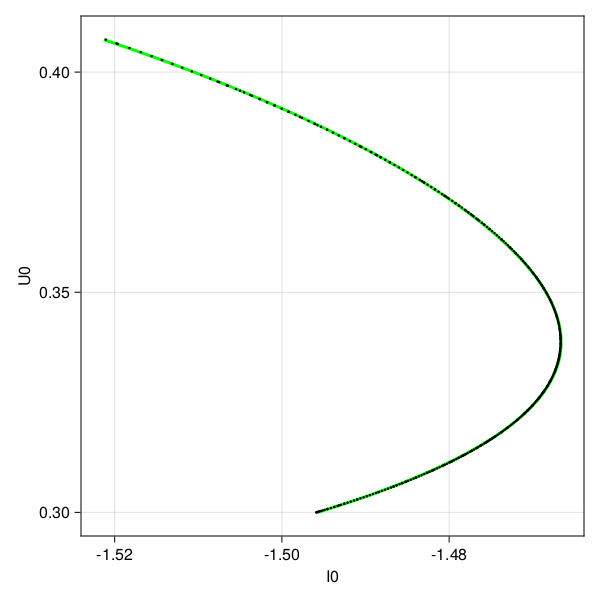

In [59]:
f = Figure(resolution = (600, 600))
axis = Axis(f[1, 1], xlabel = "I0", ylabel = "U0")

lines!(axis, x_double, U0double, linewidth = 3.0, color = :lime)
scatter!(axis, I0double, U0double, markersize = 3.5, color = :black)


f